In [35]:
import numpy as np
import chess

def convert(board):
    return np.array(list(str(board).replace('\n', '').replace(' ', ''))).reshape((8, 8))

def model(pos):
    PIECE_TO_INDEX = {'P' : 1, 'R' : 5, 'N' : 3, 'B' : 3.5, 'Q' : 9, 'K' : 0}
    black_sum = 0.000001
    white_sum = 0.000001
    
    for i in range(8):
        for j in range(8):
            piece = pos[i, j]
            if piece == '.': continue
            if piece.isupper():
                white_sum += PIECE_TO_INDEX[piece.upper()]
            else:
                black_sum += PIECE_TO_INDEX[piece.upper()]
                
    val = (white_sum - black_sum)/ (white_sum + black_sum)
    return val


def search(board, depth, alpha, beta, white):
    if board.is_game_over():
        if board.is_checkmate():
            if board.turn:
                return 1.0
            else:
                return -1.0
        else:
            return 0.0
    
    #if board.can_claim_draw():
    #    return 0.0
        
    if depth == 0:
        pos = convert(board)
        value = model(pos)
        return value
    
    if white:
        maxVal = -2.0
        for move in board.legal_moves:
            board.push(move)
            val = search(board, depth-1, alpha, beta, False)
            maxVal = np.max([val, maxVal])
            alpha = np.max([alpha, val])
            board.pop()
            if beta <= alpha:
                break
        return maxVal
    else:
        minVal = +2.0
        for move in board.legal_moves:
            board.push(move)
            val = search(board, depth-1, alpha, beta, True)
            minVal = np.min([val, minVal])
            beta = np.min([beta, val])
            board.pop()
            if beta <= alpha:
                break
        return minVal

def policy(board, depth):
    if board.is_game_over():
        print("Game Over")
        return None
    
    best_move = None
    white = board.turn
    best_val = -2.0
    if not white:
        best_val = 2.0
        
    for move in board.legal_moves:
        board.push(move)
        if white:
            val = search(board.copy(), depth-1, -2.0, best_val, board.turn)
            if best_val < val:
                best_val = val
                best_move = move
        else:
            val = search(board.copy(), depth-1, best_val, 2.0, board.turn)
            if best_val > val:
                best_val = val
                best_move = move
        board.pop()
        
    return best_move, best_val
            

In [36]:
board = chess.Board()
policy(board, 3)

(Move.from_uci('g1h3'), 0.0)

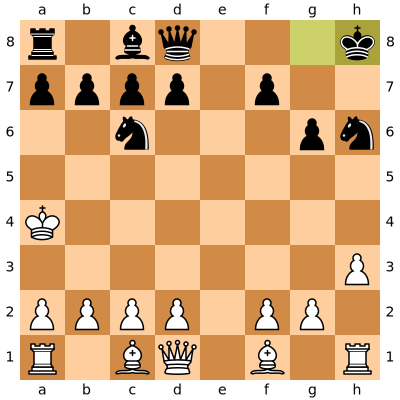

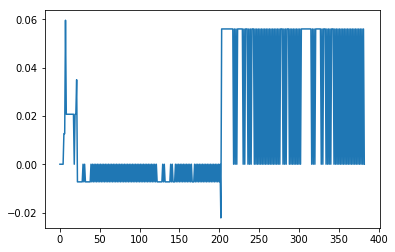

KeyboardInterrupt: 

In [42]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

board = chess.Board()
game_val = [0.0]
while not board.is_game_over() or board.can_claim_draw():
    display(board)
    plt.plot(game_val)
    plt.show()
    move, val = policy(board.copy(), 1)
    game_val.append(val)
    board.push(move)
    clear_output(wait=True)
    
    